# CIA 3: 9/9/25

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv(r"E:\AIML College\CIA 3\data.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.nunique() #Checking for unique values in each column

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.shape

(1025, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<Axes: >

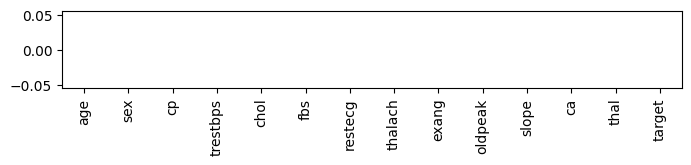

In [10]:
df.isnull().sum().plot(kind="bar", figsize=(8,1)) #Checking null values
#No null values found

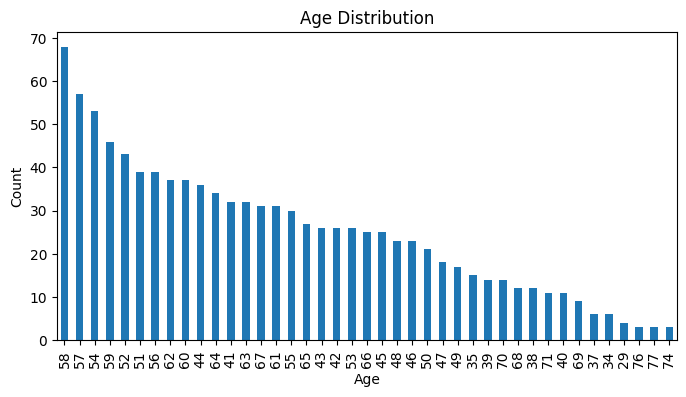

In [25]:
# Graph 1 
df["age"].value_counts().plot(kind="bar", figsize=(8,4)) #Age distribution
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

<Figure size 1000x800 with 0 Axes>

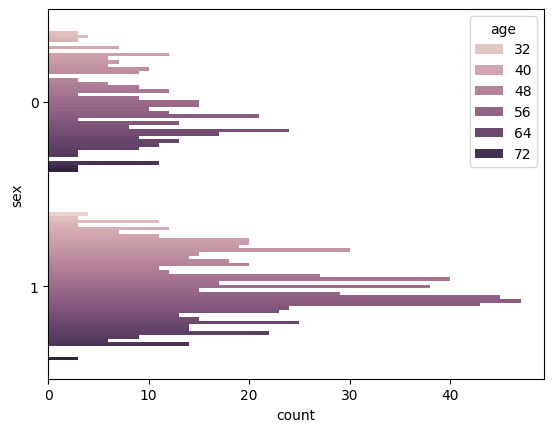

<Figure size 1000x800 with 0 Axes>

In [ ]:
# Graph 2
# For counting sex based on age (0 and 1) 
sns.countplot(data=df, y="sex", hue="age")
plt.figure(figsize=(10,8)) 

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Figure size 1000x800 with 0 Axes>

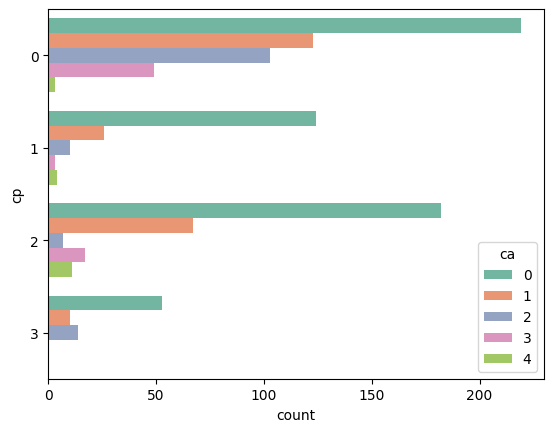

<Figure size 1000x800 with 0 Axes>

In [35]:
# Graph 3
sns.countplot(data=df, y="cp", hue="ca", palette="Set2") # Chart to see cp vs ca comparison
plt.figure(figsize=(10,8))

<Axes: xlabel='thal', ylabel='exang'>

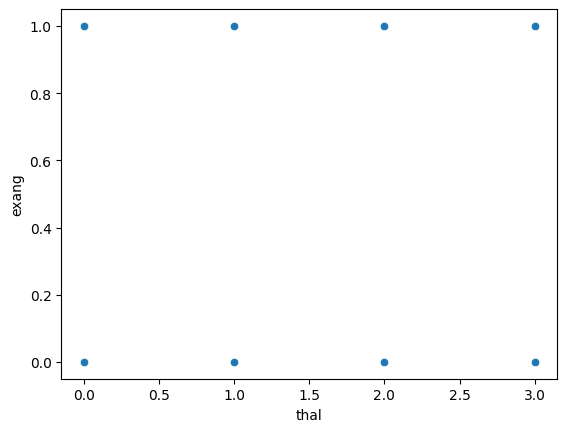

In [26]:
# Graph 4
sns.scatterplot(data=df, y="exang", x="thal")

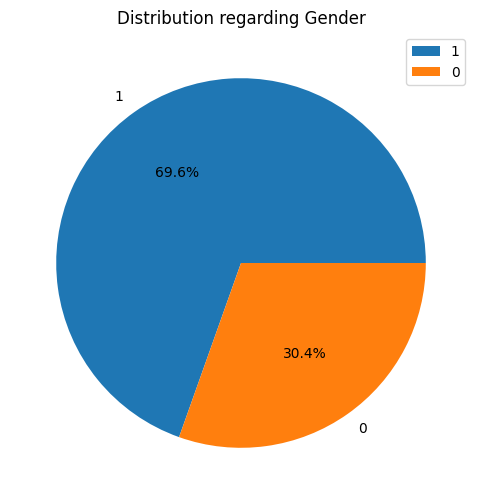

In [31]:
# Graph 5
df["sex"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.title("Distribution regarding Gender")
plt.ylabel("")
plt.legend()
plt.show()

In [32]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [33]:
df[["trestbps", "chol", "thalach", "oldpeak"]].describe() #Descriptive statistics of numerical columns

,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.00000,1025.000000,1025.000000
mean,131.611707,246.00000,149.114146,1.071512
std,17.516718,51.59251,23.005724,1.175053
min,94.000000,126.00000,71.000000,0.000000
25%,120.000000,211.00000,132.000000,0.000000
50%,130.000000,240.00000,152.000000,0.800000
75%,140.000000,275.00000,166.000000,1.800000
max,200.000000,564.00000,202.000000,6.200000


In [34]:
df[["trestbps", "thalach"]].head(10)

,trestbps,thalach
0,125,168
1,140,155
2,145,125
3,148,161
4,138,106
5,100,122
6,114,140
7,160,145
8,120,144
9,122,116


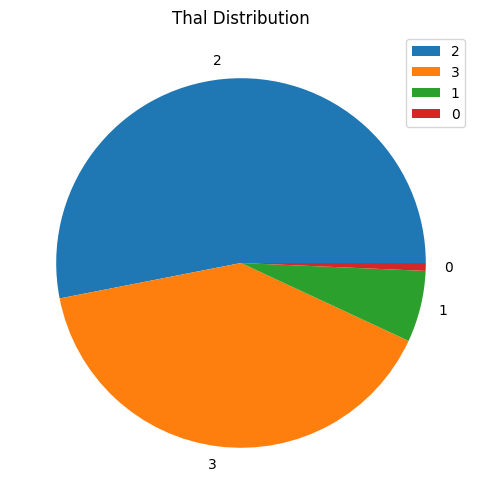

In [45]:
# Graph 6
df["thal"].value_counts().plot(kind="pie", figsize=(8,6))
plt.title("Thal Distribution")
plt.ylabel("")
plt.legend()
plt.show()

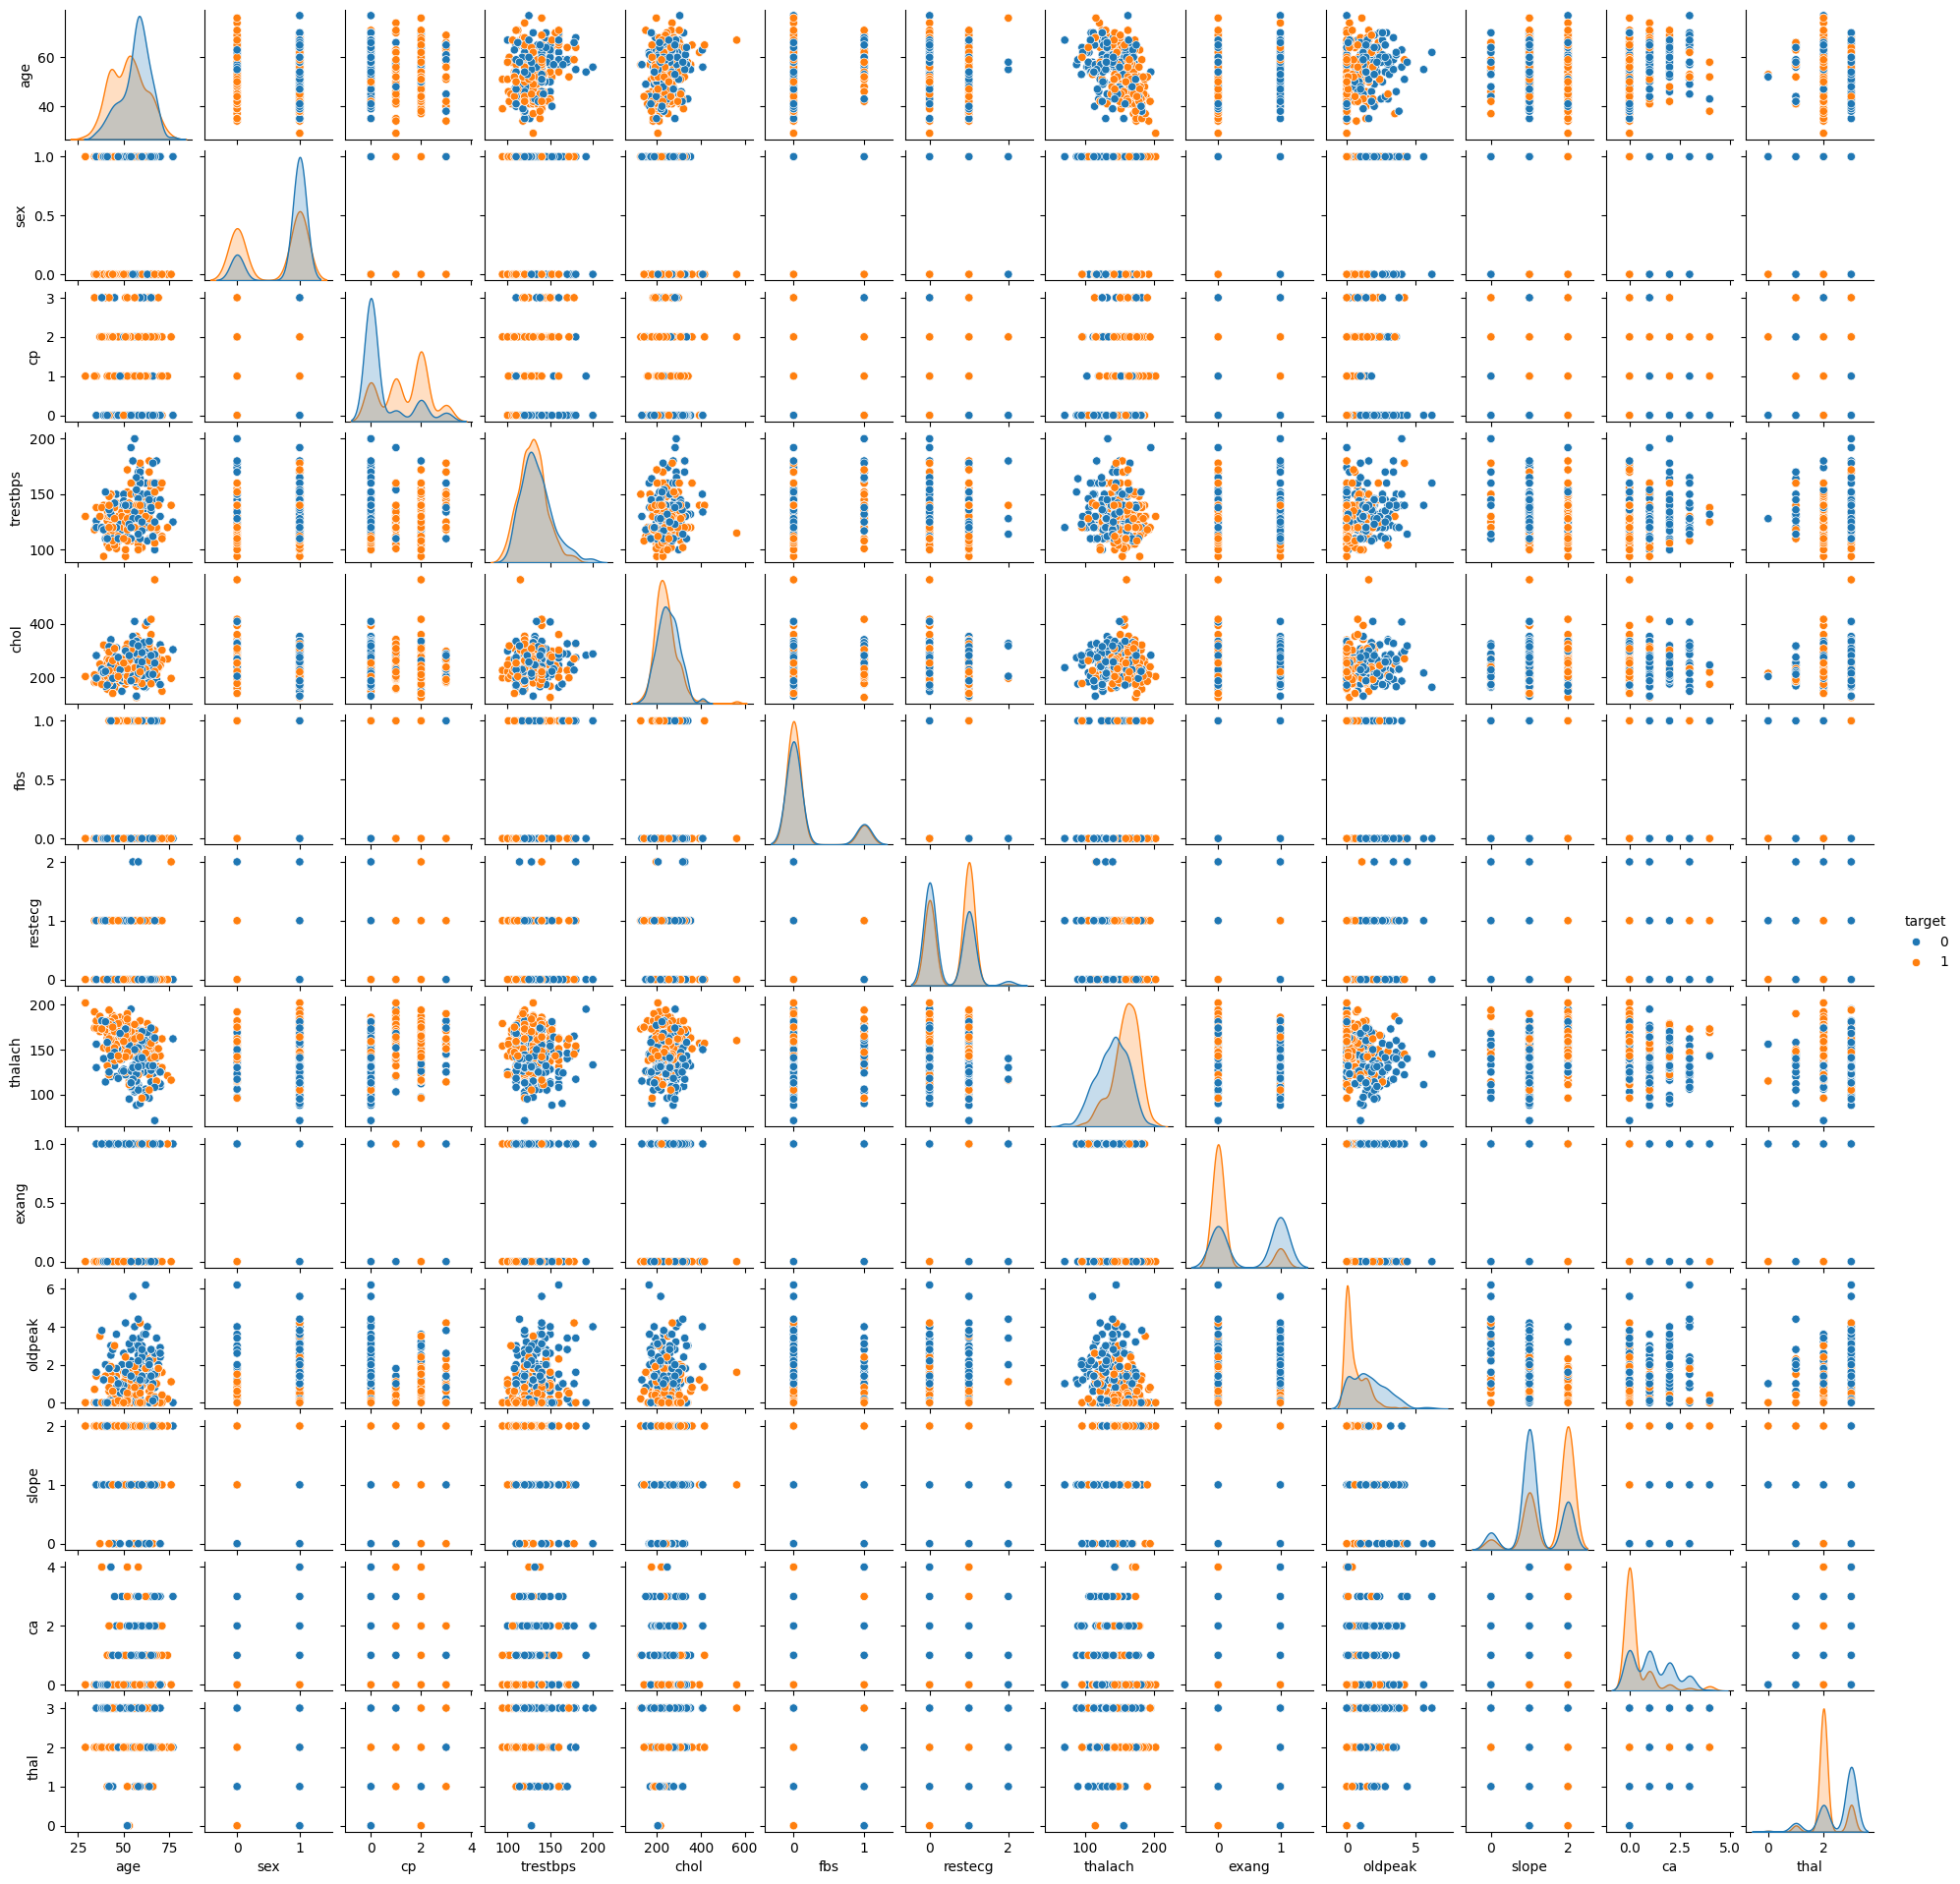

In [59]:
# Graph 7
sns.pairplot(data=df, height =1.5, hue="target")
plt.show()

# Decision Tree Algorithm

In [47]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Decision Tree Analysis
Decision Tree Rules:
|--- cp <= 0.50
|   |--- ca <= 0.50
|   |   |--- thal <= 2.50
|   |   |   |--- exang <= 0.50
|   |   |   |   |--- thalach <= 96.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- thalach >  96.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- exang >  0.50
|   |   |   |   |--- restecg <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- restecg >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- thal >  2.50
|   |   |   |--- oldpeak <= 0.65
|   |   |   |   |--- chol <= 237.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- chol >  237.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- oldpeak >  0.65
|   |   |   |   |--- class: 0
|   |--- ca >  0.50
|   |   |--- restecg <= 0.50
|   |   |   |--- class: 0
|   |   |--- restecg >  0.50
|   |   |   |--- age <= 63.50
|   |   |   |   |--- trestbps <= 109.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- trestbps >  109.00
|   |   |   |   |   |--- class: 0
| 

Text(0.5, 14.722222222222216, 'Predicted Label')

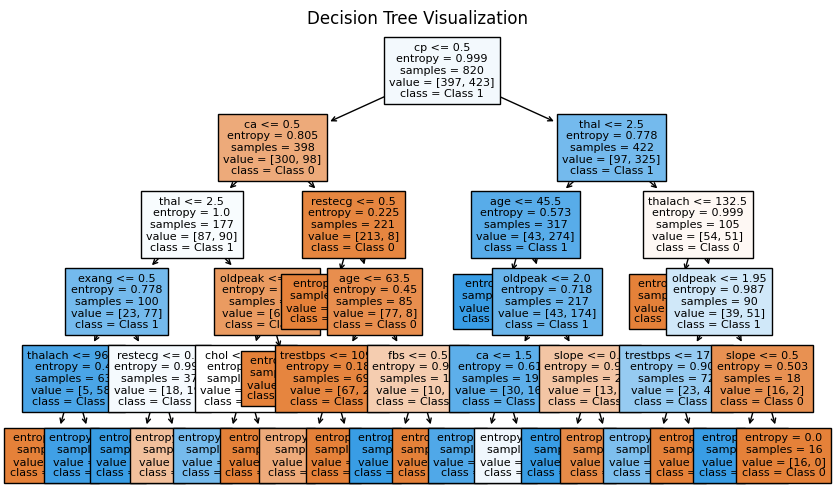

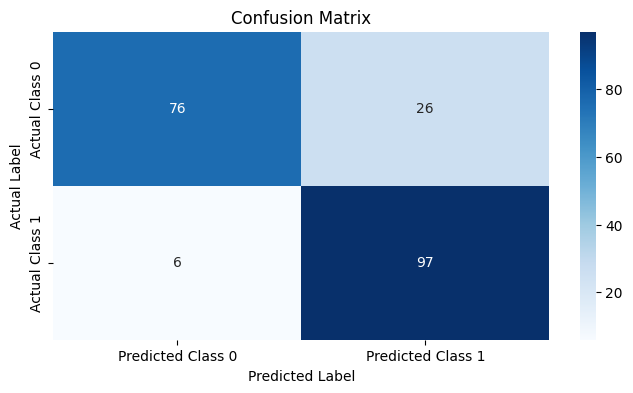

In [ ]:
# Define the target and features
X = df.drop(columns=["target"])
y = df["target"]

# The provided dataset is already numeric, so no need to handle categorical variables.

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# criterion="entropy" measures the impurity of a node, and max_depth limits the tree size
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Show the decision rules
print("Decision Tree Analysis")
print("Decision Tree Rules:")
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

# Evaluate the model's accuracy on the test set
accuracy = clf.score(X_test, y_test)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize and save the decision tree to a file
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.savefig('decision_tree.png')
print("Decision tree visualization saved as 'decision_tree.png'")

# Visualize the confusion matrix as a heatmap and save the plot
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Class 0', 'Predicted Class 1'], 
            yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Using Linear Regression Algorithm

In [62]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [63]:
x = df[["trestbps"]]  
y = df["thalach"]             
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [64]:
x_train.value_counts().sum()

820

In [65]:
x_train

,trestbps
332,130
640,138
841,138
932,140
38,128
...,...
944,178
409,150
652,150
574,125


In [66]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [67]:
y_pred = regressor.predict(x_test)

In [68]:
y_pred

array([148.71978191, 149.99592285, 148.57798847, 149.28695566,
       148.57798847, 149.00336879, 148.57798847, 148.71978191,
       149.28695566, 149.99592285, 151.41385723, 149.28695566,
       149.99592285, 149.00336879, 145.74211972, 145.88391315,
       151.34296051, 151.41385723, 147.86902128, 148.71978191,
       149.99592285, 150.13771629, 147.72722785, 149.28695566,
       149.64143926, 147.58543441, 149.28695566, 147.86902128,
       148.22350488, 147.86902128, 149.64143926, 149.99592285,
       149.00336879, 151.41385723, 149.28695566, 149.99592285,
       147.86902128, 148.2944016 , 151.41385723, 148.93247207,
       149.4287491 , 149.28695566, 145.74211972, 149.71233598,
       148.57798847, 148.57798847, 150.56309661, 150.56309661,
       149.28695566, 149.99592285, 148.43619504, 147.72722785,
       148.57798847, 150.70489004, 149.28695566, 149.4287491 ,
       147.16005409, 148.71978191, 148.93247207, 150.70489004,
       150.70489004, 148.57798847, 149.28695566, 145.88

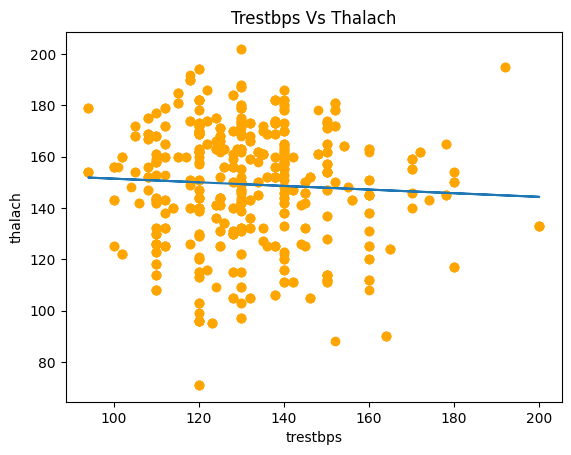

In [69]:
plt.scatter(x_train, y_train, color= "orange")
plt.plot(x_train, regressor.predict(x_train))
plt.xlabel("trestbps")
plt.ylabel("thalach")
plt.title("Trestbps Vs Thalach")
plt.show()

In [72]:
X = df.drop(columns=["target"])
y = df["target"]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build the Logistic Regression model
# The max_iter is increased to ensure the model converges
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model's performance
log_reg_accuracy = accuracy_score(y_test, y_pred)
log_reg_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Logistic Regression Analysis")
print(f"Model Accuracy: {log_reg_accuracy:.2f}")
print("Classification Report:")
print(log_reg_report)
print("Confusion Matrix:")
print(conf_matrix)


Logistic Regression Analysis
Model Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Confusion Matrix:
[[73 29]
 [13 90]]


Text(0.5, 14.722222222222216, 'Predicted Label')

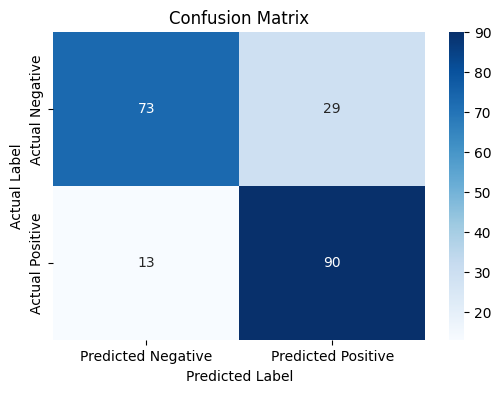

In [75]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')